# predacting home price in banglore

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [260]:
#import the dataset using pandas into a datframe
df = pd.read_csv('Bengaluru_House_Data.csv')

In [261]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [262]:
df.shape

(13320, 9)

In [263]:
#Examine the area_type feature
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [264]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [265]:
#Examine the availability feature
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [266]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
15-Dec               1
17-Jan               1
14-Jul               1
14-Nov               1
Name: availability, Length: 81, dtype: int64

In [267]:
#Examine the location feature
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [268]:
df['location'].value_counts()

Whitefield                                        540
Sarjapur  Road                                    399
Electronic City                                   302
Kanakpura Road                                    273
Thanisandra                                       234
                                                 ... 
1Hanuman Nagar                                      1
Kirloskar layout, Basaveshwarnagar                  1
Shivanagar                                          1
Ananthanagar Phase 1,Electronic City , phase 2      1
Sonam Layout                                        1
Name: location, Length: 1305, dtype: int64

In [269]:
#Examine the location feature
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [270]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Shntsad     1
Asuceis     1
B ncysi     1
SMdesy      1
JHk 1en     1
Name: society, Length: 2688, dtype: int64

In [271]:
#Examine the balcony feature
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [272]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

### after examine the above feature we came up with a conclusion that it would be better to drop the following features
-- 'society'
--'location' but it a important feature it will help us in further process


In [273]:
df1 = df.drop(['society'], axis = 1)

In [274]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


#### let's check , whether there is  any null values are present  or not-->Data Cleaning 

In [275]:
df1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [276]:
#drop the null values
df2 = df1.dropna()
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [277]:
df2.shape

(12710, 8)

### Dimensionality Reduction
###### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [278]:
df2.location = df2['location'].apply(lambda x: x.strip())
location_stats = df2['location'].value_counts(ascending=False)
location_stats

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Whitefield                                        515
Sarjapur  Road                                    372
Electronic City                                   302
Kanakpura Road                                    261
Thanisandra                                       234
                                                 ... 
Kirloskar layout, Basaveshwarnagar                  1
Shivanagar                                          1
Ananthanagar Phase 1,Electronic City , phase 2      1
SHANTHINAGAR                                        1
Sonam Layout                                        1
Name: location, Length: 1254, dtype: int64

In [279]:
location_stats.values.sum()

12710

In [280]:
len(location_stats[location_stats>10])

237

In [281]:
len(location_stats)

1254

In [282]:
len(location_stats[location_stats<=10])

1017

In [283]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Naganathapura                                     10
Kodigehalli                                       10
1st Block Koramangala                             10
Kalkere                                           10
Ganga Nagar                                       10
                                                  ..
Kirloskar layout, Basaveshwarnagar                 1
Shivanagar                                         1
Ananthanagar Phase 1,Electronic City , phase 2     1
SHANTHINAGAR                                       1
Sonam Layout                                       1
Name: location, Length: 1017, dtype: int64

In [284]:
len(df2.location.unique())

1254

In [285]:

df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.location.unique())

238

In [288]:
df2.head(20)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.0,38.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310,3.0,1.0,63.25
10,Super built-up Area,18-Feb,Whitefield,3 BHK,1800,2.0,2.0,70.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785,5.0,3.0,295.00
12,Super built-up Area,Ready To Move,7th Phase JP Nagar,2 BHK,1000,2.0,1.0,38.00


### Feature Engineering

##### feaTure engineering on 'size'  feature

In [289]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

#### some valies have BHK suffix and some have bedroom so what we will do is that we will just take first values will not take the suffix , so we will use split function 

In [290]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df3 = df2.drop(['size'], axis = 1)
df3.head()


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


### explore 'total_square_fit' 

In [291]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [292]:
# let's create a function to check the float values

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [293]:
df3[df3['total_sqft'].apply(is_float)].shape

(12524, 8)

In [294]:
df3.shape

(12710, 8)

#### **** impt. if   we want to print falsereturn values we will use '~'  character as we do in below code

In [295]:
df3[~df3['total_sqft'].apply(is_float)].head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2


In [296]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None


In [297]:

df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


### feature Engineering 
to remove outliers

In [298]:
df4.BHK.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

it is unusual to have more then 27 bhk in banglore so we will chack that they might be outliers


In [299]:
df4[df4['BHK']>9]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
459,Super built-up Area,Ready To Move,other,5000.0,9.0,3.0,360.0,11
1718,Super built-up Area,Ready To Move,other,8000.0,27.0,0.0,230.0,27
1768,Plot Area,Ready To Move,other,1200.0,11.0,0.0,170.0,11
3853,Plot Area,Ready To Move,other,1200.0,6.0,3.0,150.0,11
4684,Plot Area,Ready To Move,Munnekollal,2400.0,40.0,0.0,660.0,43
4916,Super built-up Area,Ready To Move,other,1250.0,15.0,0.0,125.0,14
6533,Plot Area,Ready To Move,Mysore Road,2232.0,6.0,2.0,300.0,12
9511,Plot Area,Ready To Move,Munnekollal,1200.0,8.0,3.0,230.0,10
9935,Super built-up Area,Ready To Move,other,5425.0,13.0,0.0,275.0,13
11142,Built-up Area,Ready To Move,Munnekollal,7200.0,10.0,3.0,200.0,10


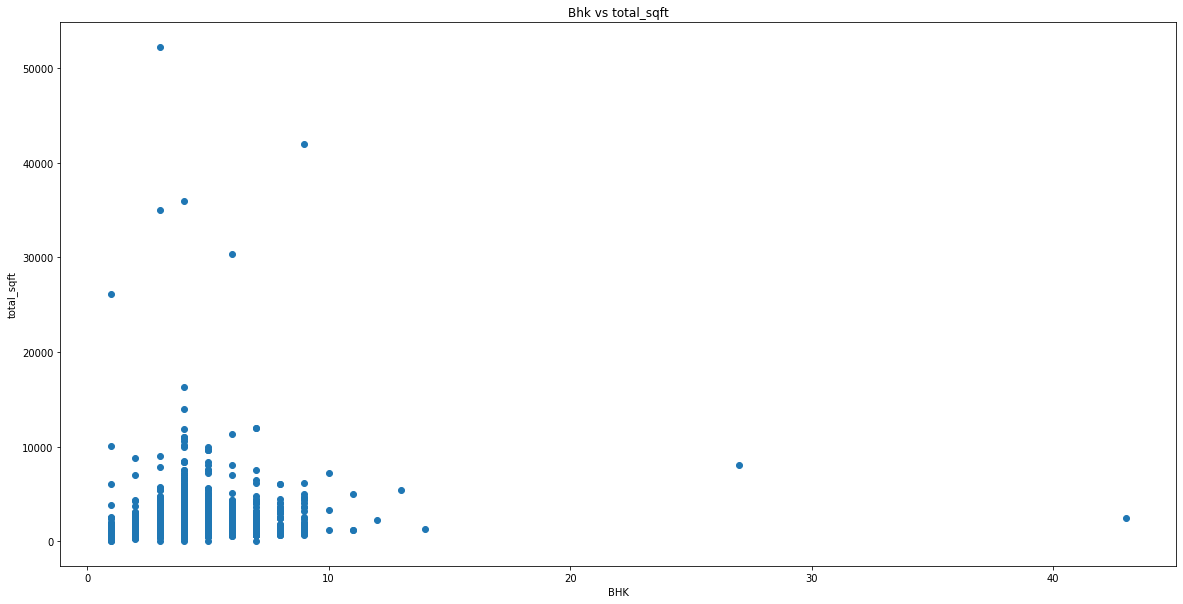

In [300]:
#let's plot bhk and total_sqFt plot

plt.scatter(df4.BHK, df4.total_sqft)
plt.xlabel('BHK')
plt.ylabel('total_sqft')
plt.title('Bhk vs total_sqft')
plt.show()

Hare above we can easily see that there are some outlier by intuton we can sat that it is impossible that 43 BHK house have such a less square fit are but it is possible that less bhk house have more square fit area there might be some vacant land

##### so to solve such a outliers problems we will take BHK per square fit are

In [301]:

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [302]:

df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.266800e+04
mean     6.876277e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

In [303]:

df5.to_csv("bhp.csv",index=False)

###### below here we took took the datapoints within one standard deviation for each location , after doing this we can remove the outliers

In [304]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10817, 9)


##### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

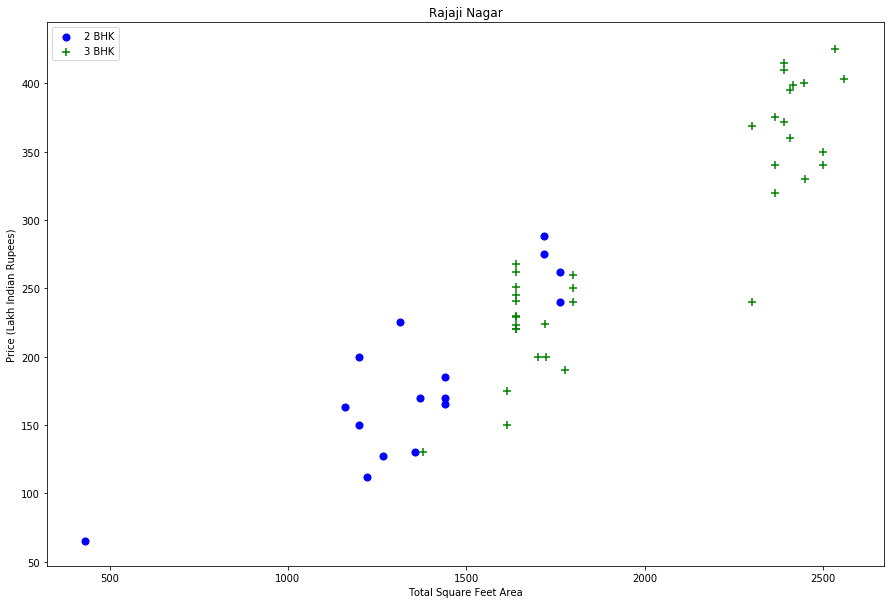

In [305]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

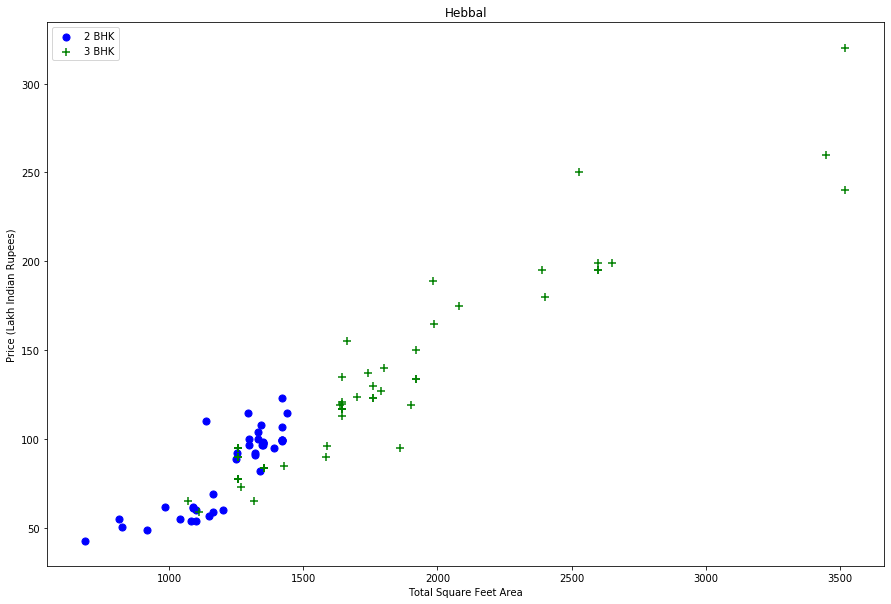

In [306]:

plot_scatter_chart(df6,"Hebbal")

### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [307]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df8 = df7.copy()
df8.shape

(7552, 9)

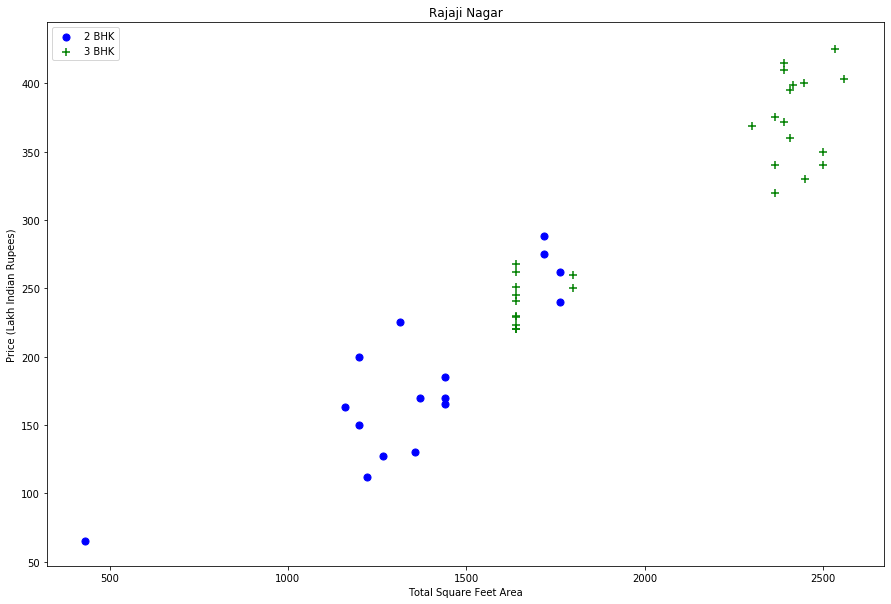

In [308]:
plot_scatter_chart(df8,"Rajaji Nagar")

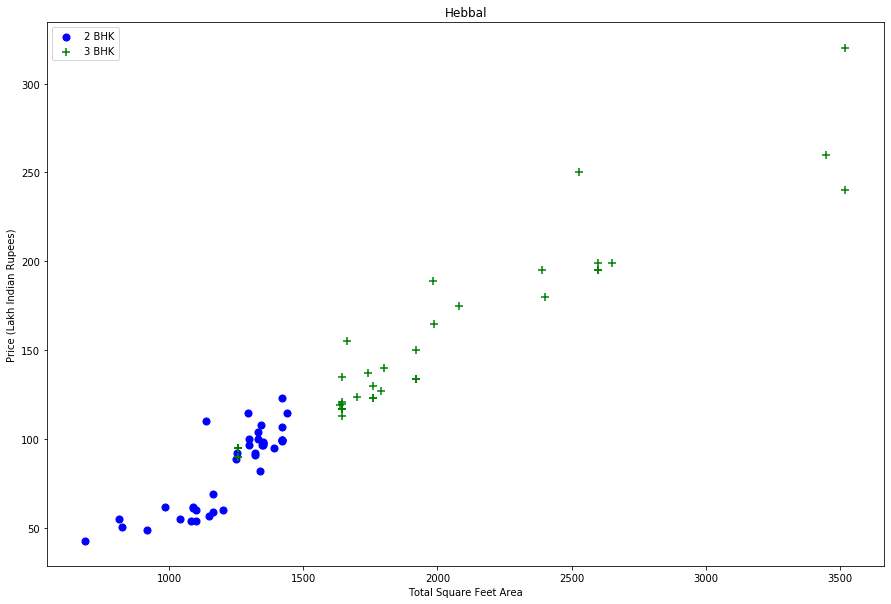

In [309]:
plot_scatter_chart(df8,"Hebbal")


#### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

Text(0, 0.5, 'Count')

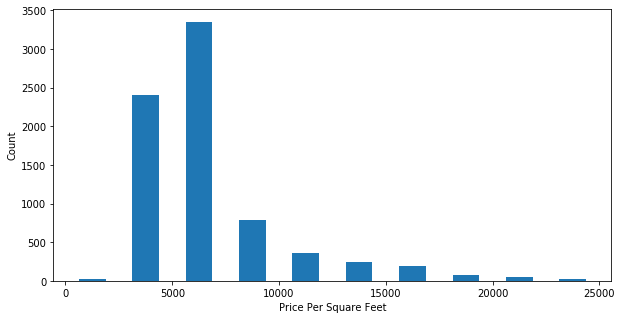

In [310]:

import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,5)
plt.hist(df8.price_per_sqft,rwidth=0.5, range = (0,25000))
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


### Outlier Removal Using Bathrooms Feature

In [311]:
df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  1.,  5.,  8.,  7.,  9., 10., 27., 11., 15.,
       13.])

Text(0, 0.5, 'Count')

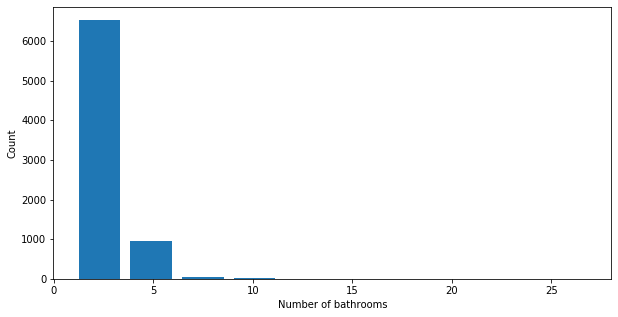

In [312]:

plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [313]:
df8[df8.bath>8]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1521,Plot Area,Ready To Move,Chamrajpet,1500.0,9.0,3.0,230.0,6,15333.333333
3375,Plot Area,Ready To Move,Hosakerehalli,1380.0,9.0,0.0,150.0,9,10869.565217
3791,Built-up Area,18-Feb,KR Puram,4600.0,9.0,2.0,200.0,9,4347.826087
4828,Plot Area,Ready To Move,Laggere,1590.0,9.0,3.0,132.0,7,8301.886792
5156,Super built-up Area,Ready To Move,Mico Layout,5000.0,9.0,3.0,210.0,9,4200.000000
5181,Built-up Area,Ready To Move,Munnekollal,7200.0,10.0,3.0,200.0,10,2777.777778
5709,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,3600.0,9.0,3.0,240.0,9,6666.666667
5838,Plot Area,Ready To Move,Rajaji Nagar,1200.0,10.0,2.0,180.0,8,15000.000000
5926,Plot Area,Ready To Move,Ramamurthy Nagar,2000.0,9.0,2.0,150.0,9,7500.000000
7180,Plot Area,Ready To Move,Vidyaranyapura,1200.0,9.0,2.0,100.0,9,8333.333333


 
##### It is unusual to have 2 more bathrooms than number of bedrooms in a home


In [314]:
df8[df8.bath>df8.BHK+2]

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1521,Plot Area,Ready To Move,Chamrajpet,1500.0,9.0,3.0,230.0,6,15333.333333
1655,Built-up Area,Ready To Move,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6798,Super built-up Area,Ready To Move,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
10116,Plot Area,Ready To Move,other,2400.0,6.0,2.0,775.0,3,32291.666667


###### Usually what happens is that there are as bathroom available as the rooms are , in sone cases there is a guest bathroom also so we can say that if there is more than 1 bathroom than number of room that would we outliers and we should remove them

In [315]:
df9 = df8[df8.bath<df8.BHK+2]
df9.shape

(7469, 9)

In [316]:
df9.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,17-Dec,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,10416.666667
3,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
4,Plot Area,Ready To Move,1st Block Jayanagar,930.0,4.0,2.0,85.0,7,9139.784946


#### now ouliers are removed so we don't need  'price_per_sqrt' feature

In [317]:

df10 = df9.drop(['price_per_sqft'],axis='columns')
df10.head(3)

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,17-Dec,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6


In [319]:
df10.availability.value_counts()

Ready To Move    5971
18-Apr            154
18-Dec            154
18-May            146
18-Aug            121
                 ... 
21-Nov              1
19-Nov              1
15-Jun              1
16-Sep              1
16-Oct              1
Name: availability, Length: 70, dtype: int64

In [325]:
df10.availability = df10.availability.apply(lambda x: 'Not Ready To Move' if x!='Ready To Move'  else  x)

In [326]:
df10.availability.value_counts()

Ready To Move        5971
Not Ready To Move    1498
Name: availability, dtype: int64

## Use One Hot Encoding For Location


In [335]:
df10.head()

,area_type,availability,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Not Ready To Move,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,Not Ready To Move,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,Not Ready To Move,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6
3,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
4,Plot Area,Ready To Move,1st Block Jayanagar,930.0,4.0,2.0,85.0,7


In [364]:
dummies = pd.get_dummies(df10, drop_first = True)

In [365]:
dummies.head()

,total_sqft,bath,balcony,price,BHK,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_1st Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,428.0,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,125.0,6,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,235.0,3,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,85.0,7,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
df11 = dummies

### Building a model now..

In [367]:
df11.shape

(7469, 246)

In [379]:
X1 = df11.drop(['price'], axis= 'columns')
X1.head()

,total_sqft,bath,balcony,BHK,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,1.0,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,3,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,7,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [369]:
y = df11['price']
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [380]:
len(X1), len(y)

(7469, 7469)

### Feature Scaling

In [381]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [382]:
X = pd.DataFrame(scaler.transform(X1), columns=X1.columns)

In [383]:
X.head()

,total_sqft,bath,balcony,BHK,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,0.221277,0.115385,0.333333,0.115385,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.117447,0.076923,0.666667,0.076923,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.080851,0.192308,0.666667,0.192308,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.138298,0.038462,1.000000,0.076923,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.057872,0.115385,0.666667,0.230769,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Let's split the dataset using sklearn

In [384]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = .2, random_state  = 12) 

#### Let's apply linear regression machine learning algorithm and check the performance

In [385]:
from sklearn.linear_model import LinearRegression
lr_clf =  LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7160341314021004

#### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [386]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.6596728 , 0.77480248, 0.63321732, 0.70607988, 0.7813589 ])

### Not a well score let's try other algorithms usomg GreedsearchCV and take the best 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#let's define a function
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' :{
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest':{
            'model':RandomForestRegressor(),
            'params':{
            }
        }
        
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        }
        )
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
        
find_best_model_using_gridsearchcv(X,y)    

##### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

### Test the model for few properties

In [447]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'BHK', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'availability_Ready To Move', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout',
       ...
       'location_Vishveshwarya Layout', 'location_Vishwapriya Layout',
       'location_Vittasandra', 'location_Whitefield',
       'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur', 'location_other'],
      dtype='object', length=245)

In [451]:
np.where(X.columns== 'location_1st Phase JP Nagar')[0][0]

8

In [452]:
X.head()

,total_sqft,bath,balcony,BHK,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,0.221277,0.115385,0.333333,0.115385,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.117447,0.076923,0.666667,0.076923,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.080851,0.192308,0.666667,0.192308,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.138298,0.038462,1.000000,0.076923,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.057872,0.115385,0.666667,0.230769,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [453]:
def predict_price(location, sqft, bath, balcony ,bhk, avail, area):  
    
    loc_index = np.where(X.columns==location)[0][0]
    avail_index  = np.where(X.columns==avail)[0][0]
    area_index  = np.where(X.columns==area)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    if avail_index >= 0:
        x[loc_index] = 1
    if area_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [455]:
predict_price('location_Vishveshwarya Layout',1000, 2,1, 2, 'availability_Ready To Move','area_type_Super built-up  Area')

1499719.4781636754


### Export the tested model to a pickle file

In [456]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that will be useful later on in our prediction application

In [458]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
SS